[INFO] Loaded 9 rows from /Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/posterior_eval7/posterior_summary.csv

[DEBUG] Aggregated summary:
   true_energy_keV  mean_error  std_error  mean_std   std_std
0              1.0   -0.017607   0.155775  0.037285  0.059834
1              3.0   -0.417134   1.588694  0.304897  0.068225
2             10.0  -12.521831  21.061433  1.382203  1.744241


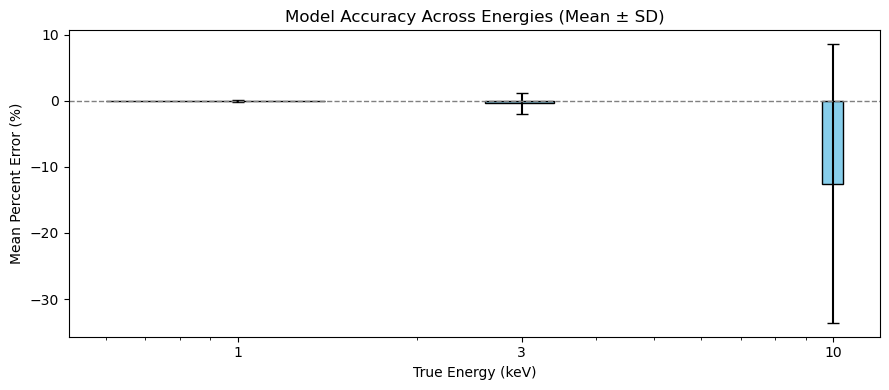

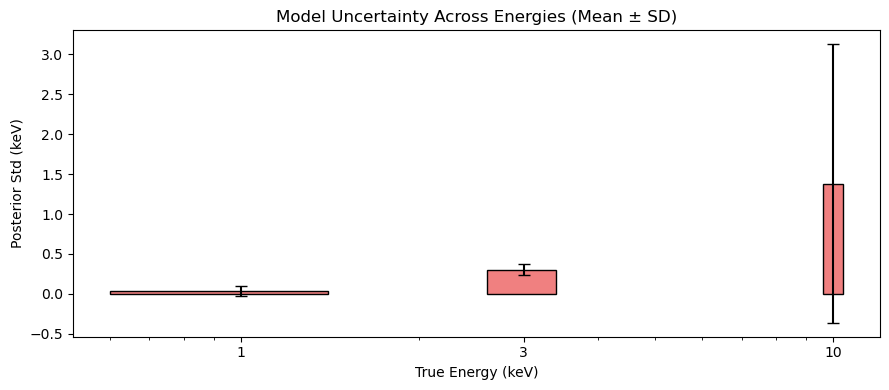


[SUMMARY] Global mean absolute percent error: 4.57%
[SUMMARY] Max absolute percent error: 36.84%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load results ---
csv_path = "/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/posterior_eval/posterior_summary.csv"
df = pd.read_csv(csv_path)
print(f"[INFO] Loaded {len(df)} tracks from {csv_path}")

# --- Aggregate per energy ---
agg = df.groupby("true_energy_keV").agg(
    mean_error=("percent_error", "mean"),
    mean_std=("posterior_std_keV", "mean")
).reset_index()

# --- Round for readability ---
agg["mean_error"] = agg["mean_error"].round(2)
agg["mean_std"] = agg["mean_std"].round(3)
print("\n[SUMMARY TABLE]")
print(agg)

# --- Plot setup ---
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Plot 1: Mean Percent Error
axes[0].bar(agg["true_energy_keV"].astype(str), agg["mean_error"],
            color="skyblue", edgecolor="black")
axes[0].axhline(0, color="gray", linestyle="--", linewidth=1)
axes[0].set_ylabel("Mean Percent Error (%)")
axes[0].set_title("Model Accuracy per Energy")

# Plot 2: Posterior Std (Uncertainty)
axes[1].bar(agg["true_energy_keV"].astype(str), agg["mean_std"],
            color="lightcoral", edgecolor="black")
axes[1].set_ylabel("Posterior Std (keV)")
axes[1].set_xlabel("True Energy (keV)")
axes[1].set_title("Model Uncertainty per Energy")

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
from pathlib import Path

# --- PATHS ---
data_dir = Path("/Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data")
input_file = data_dir / "all_vacancies.csv"

print(f"[INFO] Loading data from: {input_file}")

# --- LOAD DATA ---
df = pd.read_csv(
    input_file,
    comment="#",
    header=None,
    names=["x_ang", "y_ang", "z_ang", "ion_number", "energy_eV"]
)

print(f"[INFO] Loaded {len(df)} rows with columns: {df.columns.tolist()}")
print(df.head())

# --- CONVERT eV → keV ---
df["energy_keV"] = df["energy_eV"] / 1000.0  # convert to keV
df["energy_keV"] = df["energy_keV"].round().astype(int)

print("[DEBUG] Unique energies (rounded, keV):", sorted(df["energy_keV"].unique())[:20])

# --- DEFINE GROUPS ---
groups = {
    "low_1_3_10": [1, 3, 10],
    "mid_30_100_800": [30, 100, 800],
    "high_1200_1600_2000": [1200, 1600, 2000],
}

# --- SPLIT & SAVE ---
for name, energies in groups.items():
    subset = df[df["energy_keV"].isin(energies)]
    out_path = data_dir / f"{name}.csv"
    subset.to_csv(out_path, index=False)
    print(f"[SAVED] {len(subset)} rows → {out_path.name}")

print("\n✅ DONE: Created 3 grouped CSVs successfully.")

[INFO] Loading data from: /Users/cbharathulwar/Documents/Research/Walsworth/Code/SBI/srim-sbi/data/all_vacancies.csv
[INFO] Loaded 8054083 rows with columns: ['x_ang', 'y_ang', 'z_ang', 'ion_number', 'energy_eV']
    x_ang   y_ang   z_ang  ion_number  energy_eV
0   851.0  1.3090   3.563           0  1200000.0
1   894.6  1.1810   4.171           0  1200000.0
2   894.6  2.2330   9.319           0  1200000.0
3   894.0  2.4510  10.960           0  1200000.0
4  1025.0 -0.5339   5.079           0  1200000.0
[DEBUG] Unique energies (rounded, keV): [1, 3, 10, 30, 100, 800, 1200, 1600, 2000]
[SAVED] 411482 rows → low_1_3_10.csv
[SAVED] 2870561 rows → mid_30_100_800.csv
[SAVED] 4772040 rows → high_1200_1600_2000.csv

✅ DONE: Created 3 grouped CSVs successfully.
